Коэффициенты модели: [0.35746902]
Свободный член: 1.9103353284095776
MSE: 0.5157885558772118
R²: 0.21299417201611526


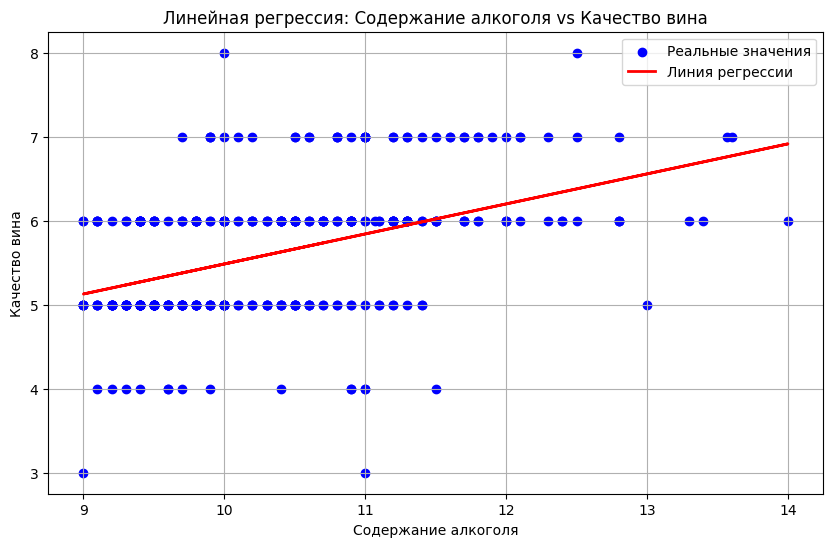

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('winequality-red.csv', sep=';')



X = data[['alcohol']]  
Y = data['quality']    


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=76)


model = LinearRegression()
model.fit(X_train, Y_train)


print(f'Коэффициенты модели: {model.coef_}')
print(f'Свободный член: {model.intercept_}')

Y_pred = model.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


plt.figure(figsize=(10, 6))


plt.scatter(X_test, Y_test, color='blue', label='Реальные значения')


plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Линия регрессии')


plt.title('Линейная регрессия: Содержание алкоголя vs Качество вина')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Качество вина')
plt.legend()
plt.grid(True)


plt.show()

Degree: 2, MSE: 0.5137, R²: 0.2162
Degree: 3, MSE: 0.5135, R²: 0.2166
Degree: 4, MSE: 0.5135, R²: 0.2165
Degree: 5, MSE: 0.5137, R²: 0.2161
Degree: 6, MSE: 0.5164, R²: 0.2121
Degree: 7, MSE: 0.5160, R²: 0.2126
Degree: 8, MSE: 0.5157, R²: 0.2131
Degree: 9, MSE: 0.5154, R²: 0.2136
Degree: 10, MSE: 0.5151, R²: 0.2140
Degree: 11, MSE: 0.5149, R²: 0.2144
Degree: 12, MSE: 0.5146, R²: 0.2148
Degree: 13, MSE: 0.5144, R²: 0.2151
Degree: 14, MSE: 0.5141, R²: 0.2155
Degree: 15, MSE: 0.5139, R²: 0.2159
Degree: 16, MSE: 0.5137, R²: 0.2162
Degree: 17, MSE: 0.5135, R²: 0.2165
Degree: 18, MSE: 0.5133, R²: 0.2168
Degree: 19, MSE: 0.5132, R²: 0.2170
Degree: 20, MSE: 0.5131, R²: 0.2171
Degree: 21, MSE: 0.5131, R²: 0.2170
Degree: 22, MSE: 0.5132, R²: 0.2170
Degree: 23, MSE: 0.5133, R²: 0.2168
Degree: 24, MSE: 0.5135, R²: 0.2165
Degree: 25, MSE: 0.5137, R²: 0.2162
Degree: 26, MSE: 0.5140, R²: 0.2158
Degree: 27, MSE: 0.5142, R²: 0.2153
Degree: 28, MSE: 0.5146, R²: 0.2148
Degree: 29, MSE: 0.5150, R²: 0.2142


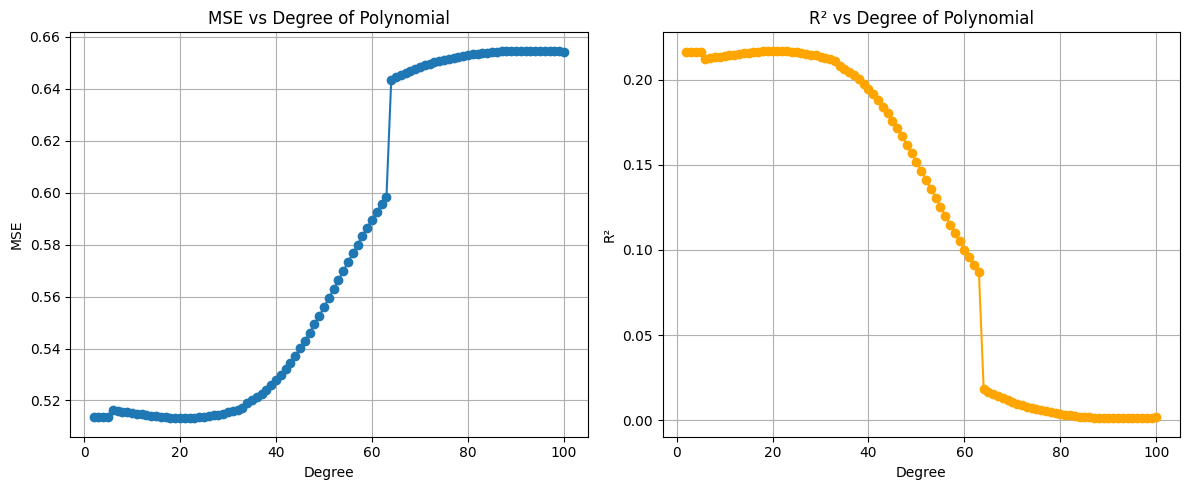

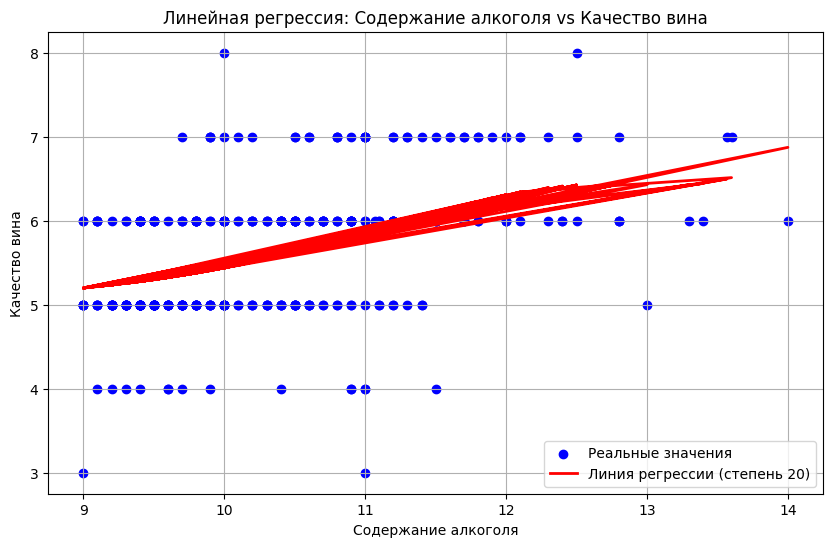

In [35]:
from sklearn.preprocessing import PolynomialFeatures





X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=76)
best_degree = 0
best_mse = float('inf')
best_r2 = -float('inf')


degrees = list(range(2, 101))
mse_values = []
r2_values = []

for degree in degrees:
  
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

 
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)


    Y_pred = model.predict(X_test_poly)

  
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

   
    mse_values.append(mse)
    r2_values.append(r2)

   
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_degree = degree

    print(f"Degree: {degree}, MSE: {mse:.4f}, R²: {r2:.4f}")


print(f"\nЛучшая степень: {best_degree}")
print(f"MSE: {best_mse:.4f}")
print(f"R²: {best_r2:.4f}")


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o')
plt.title('MSE vs Degree of Polynomial')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', color='orange')
plt.title('R² vs Degree of Polynomial')
plt.xlabel('Degree')
plt.ylabel('R²')
plt.grid(True)


plt.tight_layout()
plt.show()

poly_best = PolynomialFeatures(degree=best_degree)
X_train_best = poly_best.fit_transform(X_train)
X_test_best = poly_best.transform(X_test)

model_best = LinearRegression()
model_best.fit(X_train_best, Y_train)
Y_pred_best = model_best.predict(X_test_best)

plt.figure(figsize=(10, 6))


plt.scatter(X_test, Y_test, color='blue', label='Реальные значения')
#X_test_flat = X_test.ravel()

#sorted_indices = X_test_flat.argsort()
plt.plot(X_test, Y_pred_best, color='red', linewidth=2, label=f'Линия регрессии (степень {best_degree})')


plt.title('Линейная регрессия: Содержание алкоголя vs Качество вина')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Качество вина')
plt.legend()
plt.grid(True)

plt.show()
   